In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import warnings
warnings.filterwarnings("ignore")

### Importacion de los datos

In [90]:
df= pd.read_csv (r'europe.csv')
df.head(3)

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.8,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.3,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.6,-0.80,9.6


### Estandarizacion de los datos

In [91]:
#Estandarizo los datos
df_countries= df["Country"]
df_stand=  StandardScaler().fit_transform(df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]])
df_stand= pd.DataFrame(df_stand, columns=df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]].columns)

df_st= pd.DataFrame({'Country': df_countries, 'Area': df_stand["Area"], 'GDP': df_stand["GDP"],
                     'Inflation': df_stand["Inflation"], 'Life.expect': df_stand["Life.expect"],
                     'Military': df_stand["Military"], 'Pop.growth': df_stand["Pop.growth"],
                     'Unemployment': df_stand["Unemployment"]})

In [92]:
df_st.head(3)

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,Belgium,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,Bulgaria,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973


### Comparativa entre los datos de entrada y los estandarizados

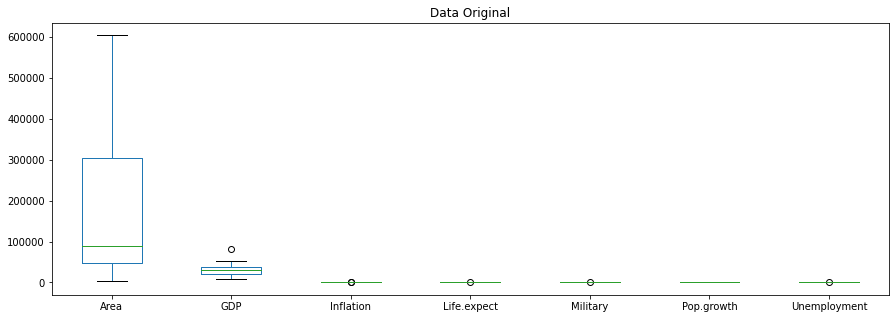

In [93]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1 = df.boxplot(column=["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"], grid=False)
ax1.set_title('Data Original')
plt.show()

Podemos ver como la unidad utilizada para Area es muy grande respecto a las demas y como esto crearia un bias en la varianza.

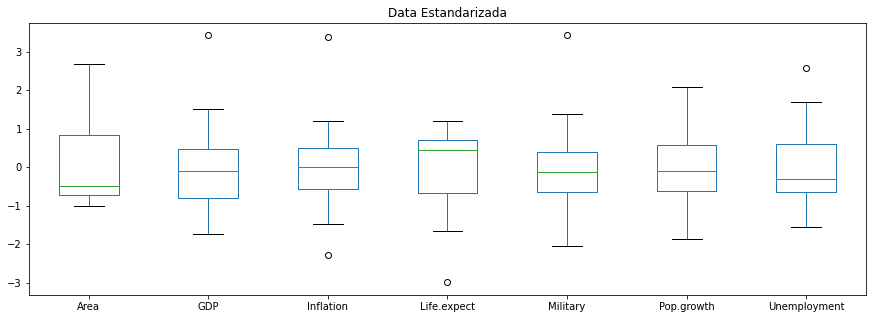

In [94]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1 = df_st.boxplot(column=["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"], grid=False)
ax1.set_title('Data Estandarizada')
plt.show()

Ahora al estandarizar estas variables, pasan a tener media 0 y desviacion estandar 1, haciendo que Area no domine las demas solo por su unidad.

### Varianza de los componentes

In [95]:
pca_out = PCA().fit(df_stand)

# get the component variance
# Proportion of Variance (from PC1 to PC7)
#pd.DataFrame(pca_out.explained_variance_ratio_, columns=pc_list)

variance = pca_out.explained_variance_ratio_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
dict_aux = dict(zip(pc_list, variance))
#pd.DataFrame(list(dict_aux.items()), columns=['PC i', 'Var(PC i)'])
var_table = pd.DataFrame([dict_aux])
var_table.rename(index={0:'Var(PC i)'})

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Var(PC i),0.461024,0.169589,0.151884,0.110051,0.065407,0.024096,0.017949


### Variabilidad retenida acumulada entre los PCs

In [96]:
cumu_var = np.cumsum(pca_out.explained_variance_ratio_)
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
cumu_dict_aux = dict(zip(pc_list, cumu_var))
cumu_var_table = pd.DataFrame([cumu_dict_aux])
cumu_var_table.rename(index={0:'Cumulative Var(PC i)'})


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Cumulative Var(PC i),0.461024,0.630613,0.782497,0.892548,0.957955,0.982051,1.0


### Cargas (loadings) de los componentes

In [97]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_stand.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
variable,,,,,,,
Area,0.124874,-0.172872,0.898297,0.044850,-0.324017,0.190118,0.066643
GDP,-0.500506,-0.130140,0.083956,-0.084255,0.390632,0.638657,-0.397408
Inflation,0.406518,-0.369657,0.198195,0.164686,0.689501,-0.323867,-0.226700
Life.expect,-0.482873,0.265248,0.246082,0.026771,-0.101787,-0.606434,-0.507031
Military,0.188112,0.658267,0.243679,-0.562375,0.368148,0.035596,0.137310
Pop.growth,-0.475704,0.082622,0.163697,0.392463,0.347868,-0.120856,0.671147
Unemployment,0.271656,0.553204,0.000500,0.701968,0.010159,0.259705,-0.244662


### Analisis de la Primera Componente Principal



*`PC1 = 0.124874*Area - 0.500506*GDP + 0.406518*Inflation - 0.482873*Life.expect + 0.188112*Military - 0.475704*Pop.growth + 0.271656*Unemployment`*

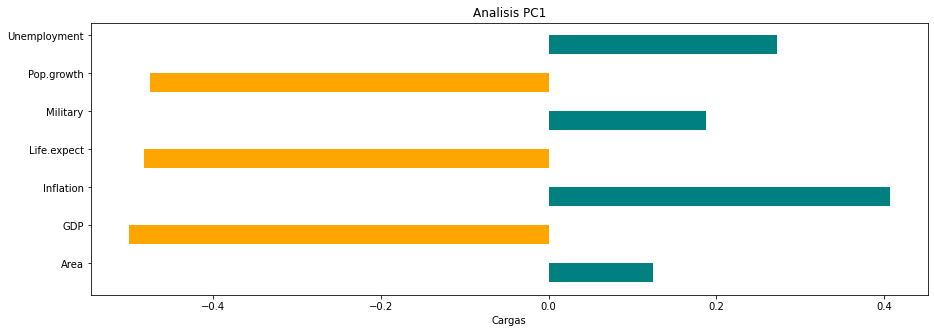

In [98]:
import numpy as np
import matplotlib.pyplot as plt

a = loadings_df['PC1']

x = list(a.index)
y = list(a)

fig, ax = plt.subplots(figsize=(15,5))  
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups

cc=['colors']*len(y)
for n,val in enumerate(y):
    if val<0:
        cc[n]='orange'
    elif val>=0:
        cc[n]='teal'

#ax.barh(ind, y, width, color="blue")
ax.barh(ind, y, width, color=cc)

ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)


plt.title('Analisis PC1')
plt.xlabel('Cargas')
plt.show()

Las cargas Unemployment, Military, Inflation y Area son positivas, por lo que las variables y la componente tienen una correlacion positiva.

Las variables Inflation, Life.expect, Pop.growth y GDP son aquellas de mayor peso, la primera componente parece recoger informacion socioeconomica.

#### Autovalores

In [99]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_
eigenval = pd.DataFrame(pca_out.explained_variance_)
eigenval = eigenval.rename(columns={0:'Autovalores'})
eigenval

,Autovalores
0,3.346690
1,1.231091
2,1.102568
3,0.798888
4,0.474806
5,0.174921
6,0.130295


#### code refactor...

In [100]:
# get PC scores
pca_scores = PCA().fit_transform(df_stand)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df_stand.columns.values,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [101]:
X = df.iloc[:,1:8]
target = df['Country'].to_numpy()
X.head(3)

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.8,0.03,4.2
1,30528,37800,3.5,79.65,1.3,0.06,7.2
2,110879,13800,4.2,73.84,2.6,-0.80,9.6


In [102]:
X_st =  StandardScaler().fit_transform(X)
pca_out = PCA().fit(X_st)

# component loadings
loadings = pca_out.components_
loadings


array([[ 1.24873902e-01, -5.00505858e-01,  4.06518155e-01,
        -4.82873325e-01,  1.88111616e-01, -4.75703554e-01,
         2.71655820e-01],
       [-1.72872202e-01, -1.30139553e-01, -3.69657243e-01,
         2.65247797e-01,  6.58266888e-01,  8.26219831e-02,
         5.53203705e-01],
       [ 8.98296740e-01,  8.39557607e-02,  1.98194675e-01,
         2.46082460e-01,  2.43679433e-01,  1.63697207e-01,
         5.00135736e-04],
       [ 4.48503976e-02, -8.42554739e-02,  1.64685649e-01,
         2.67714373e-02, -5.62374796e-01,  3.92462767e-01,
         7.01967912e-01],
       [-3.24016926e-01,  3.90632444e-01,  6.89500539e-01,
        -1.01786561e-01,  3.68147581e-01,  3.47867772e-01,
         1.01587422e-02],
       [ 1.90118083e-01,  6.38657073e-01, -3.23867263e-01,
        -6.06434187e-01,  3.55960680e-02, -1.20855625e-01,
         2.59704965e-01],
       [ 6.66428246e-02, -3.97408435e-01, -2.26700295e-01,
        -5.07031305e-01,  1.37309597e-01,  6.71146682e-01,
        -2.4466243

In [103]:
pca_out.explained_variance_

array([3.34669033, 1.23109094, 1.10256796, 0.79888768, 0.47480597,
       0.17492107, 0.13029529])

### Biplot PCA 2D

In [104]:
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

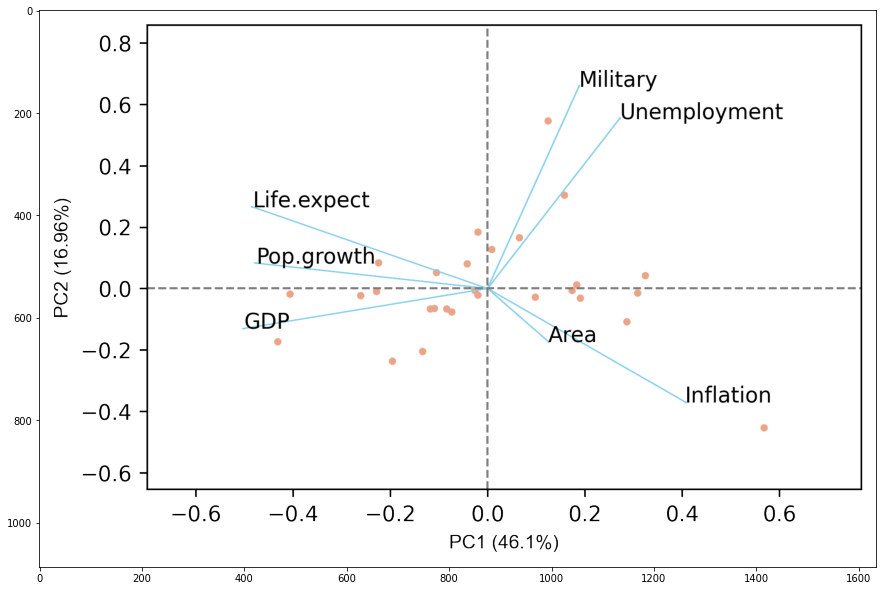

In [105]:
import matplotlib.image as mpimg
img = mpimg.imread('biplot_2d.png')
imgplot = plt.imshow(img)
plt.rcParams['figure.figsize'] = (15, 20)
plt.show()

### Analizando los ángulos:
* Cuanto menor es el ángulo entre vectores, más relacionados están
* Ángulos rectos implican que no hay correlación
* Ángulos opuestos indican correlación negativa
* Ángulos más cercanos a los ejes ondican mayor contribución de esa variable a esa componente

Correlación entre:
* Area e Inflation
* Military y Unemployment
* Life expectancy, Population growth y GDP

Correlación negativa entre:
* Area e inflation con life expec, Pop.growth y GDP

Falta de correlación con las anteriores:
* Military y Unemployment

Influencia sobre PC1 (en concordancia con el primer gráfico):
* Inflation
* Life.expect
* Pop.growth
* GDP



Se puede observar que la primera componente principal aporta un 46% de información, y la segunda aporta 17%

Parece haber un outlyer abajo a la derecha, que podría influir

### Biplot PCA 3D

In [106]:
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

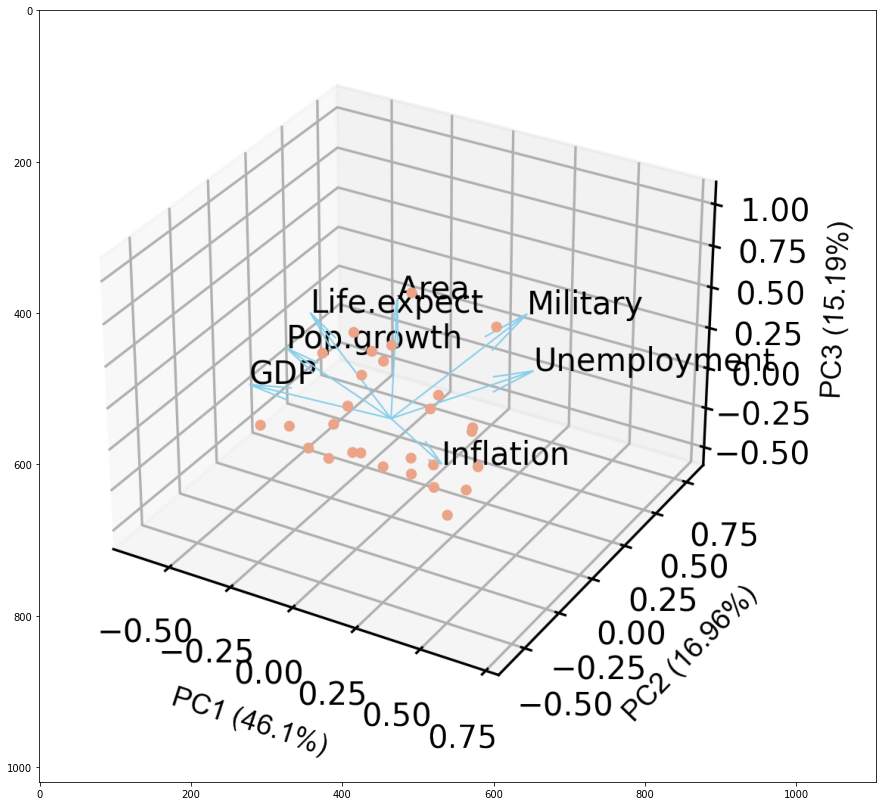

In [107]:
import matplotlib.image as mpimg
img = mpimg.imread('biplot_3d.png')
imgplot = plt.imshow(img)
plt.rcParams['figure.figsize'] = (15, 20)
plt.show()

Agregando la tercera componente principal se aporta un 15% más de información